In [5]:
import pylab
import calendar
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import datasets

In [6]:
train_data = pd.read_csv("data/train.csv")
# train_data = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 1. Exploratory Data Analysis

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### 2. Data Visualization
#### data processing

In [10]:
train_data["date"] = train_data["datetime"].apply(lambda x: x.split()[0])
train_data["hour"] = train_data["datetime"].apply(lambda x: x.split()[1].split(":")[0])
train_data["year"] = train_data["date"].apply(lambda x: x.split("-")[0])
train_data["month"] = train_data["date"].apply(lambda x: x.split("-")[1])
train_data["weekday"] = train_data["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d").weekday())
train_data.drop(["date", "casual", "registered"], axis=1, inplace=True)
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,00,2011,01,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,01,2011,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,02,2011,01,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,03,2011,01,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,04,2011,01,5


In [11]:
train_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
hour             24
year              2
month            12
weekday           7
dtype: int64

#### data type count visualization

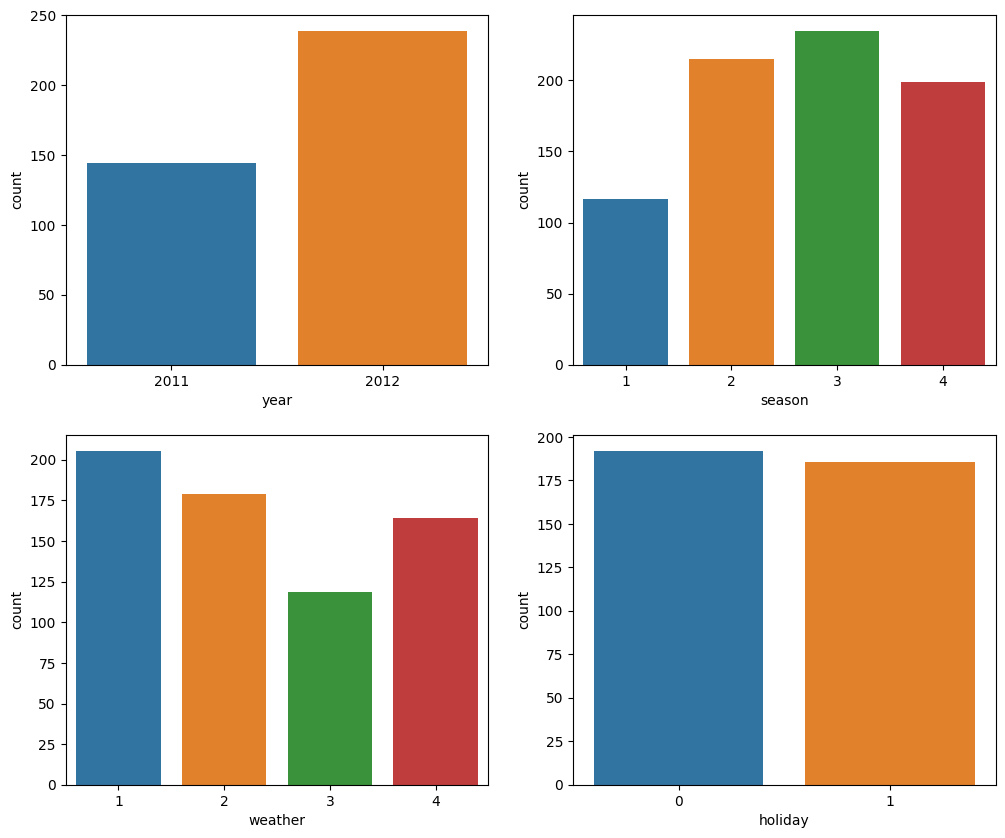

In [12]:
fig = plt.figure(figsize=[12,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data=train_data.groupby("year")["count"].mean().reset_index(), x="year", y="count")

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data=train_data.groupby("season")["count"].mean().reset_index(), x="season", y="count")

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data=train_data.groupby("weather")["count"].mean().reset_index(), x="weather", y="count")

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data=train_data.groupby("holiday")["count"].mean().reset_index(), x="holiday", y="count")

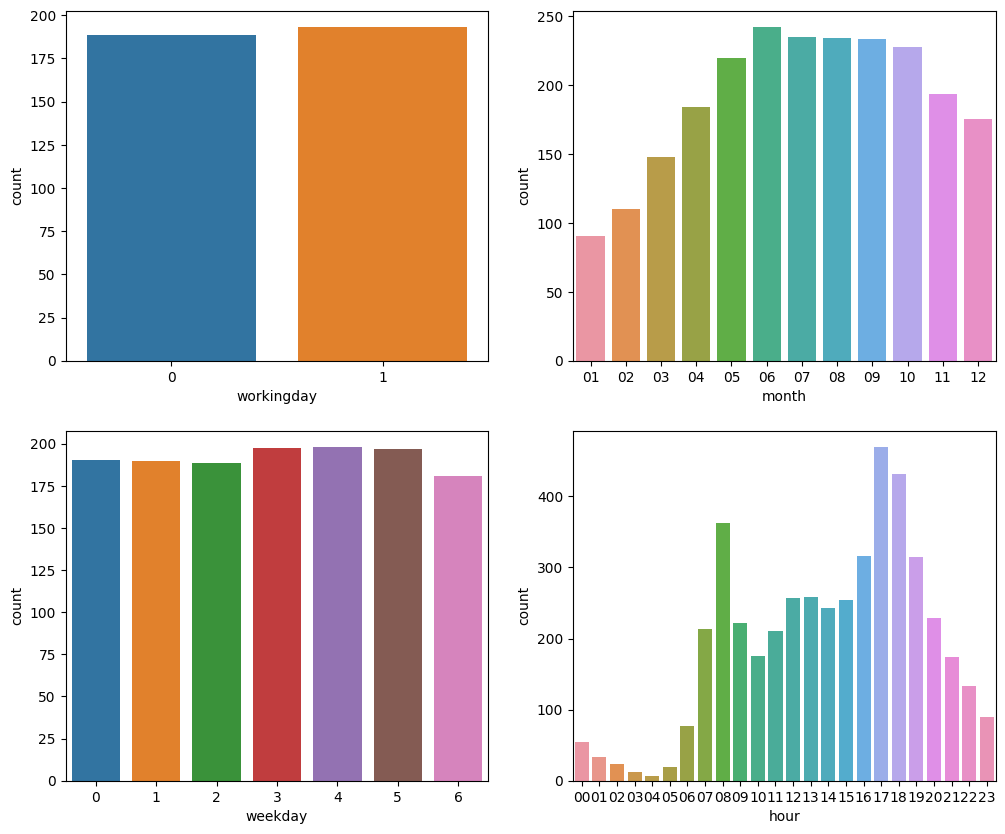

In [13]:
fig = plt.figure(figsize=[12,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data=train_data.groupby("workingday")["count"].mean().reset_index(), x="workingday", y="count")

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data=train_data.groupby("month")["count"].mean().reset_index(), x="month", y="count")

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data=train_data.groupby("weekday")["count"].mean().reset_index(), x="weekday", y="count")

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data=train_data.groupby("hour")["count"].mean().reset_index(), x="hour", y="count")

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

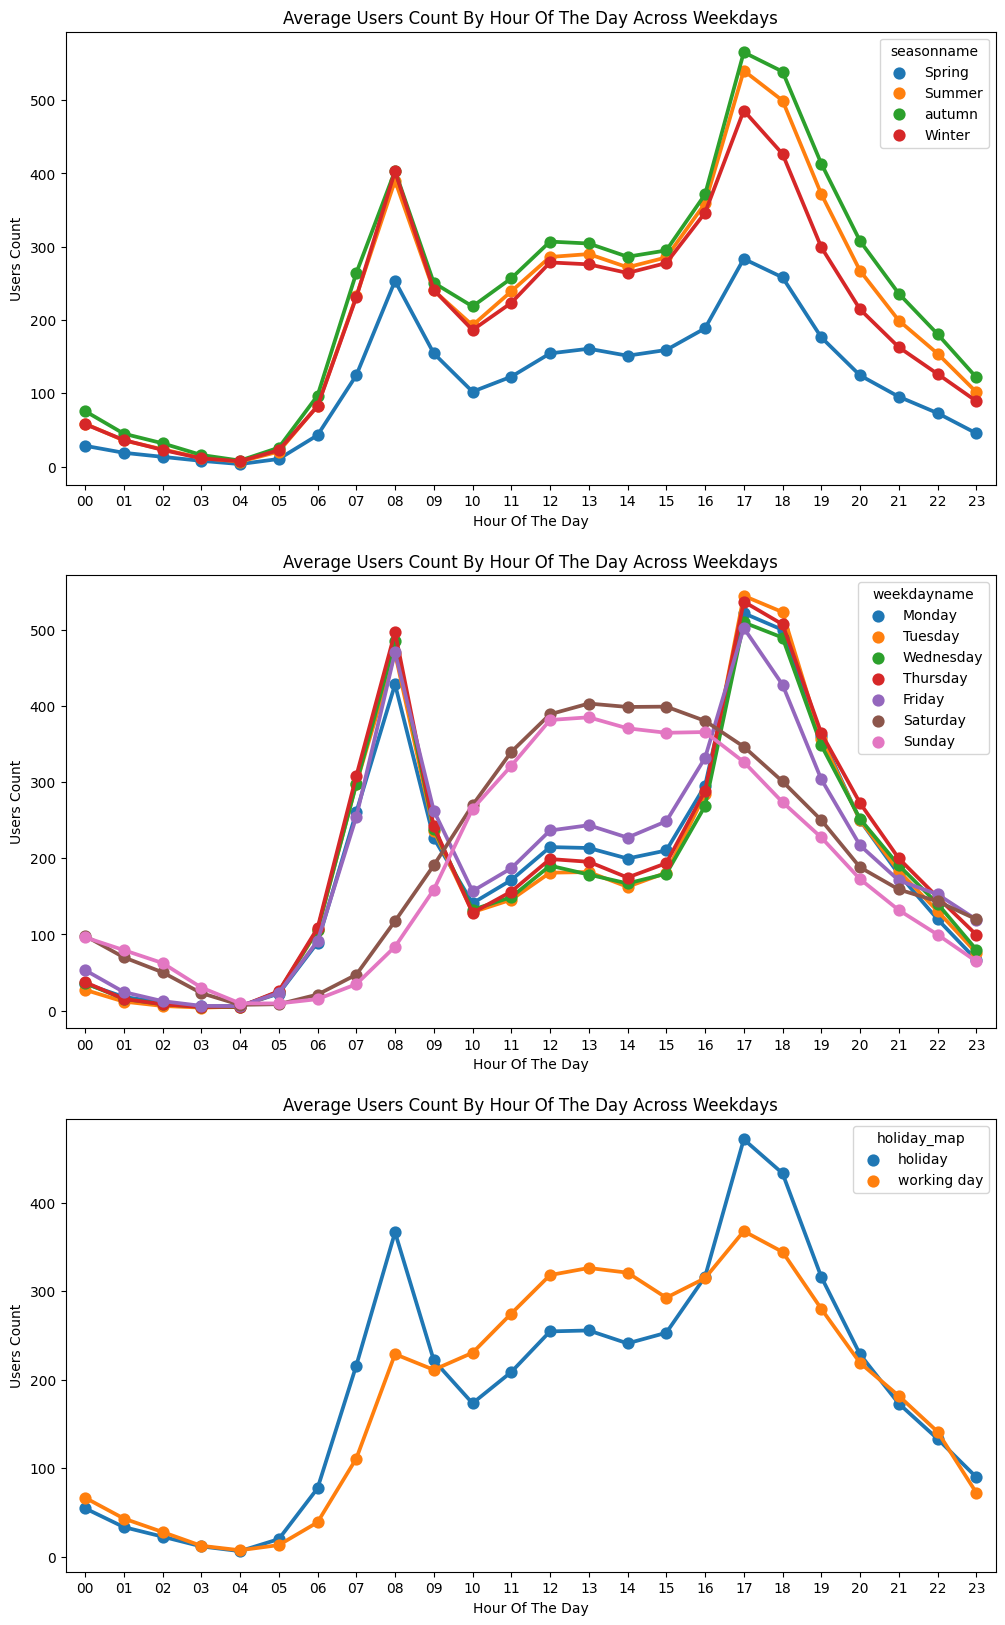

In [14]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,20)

hour_season = pd.DataFrame(train_data.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
hour_season["seasonname"] = hour_season.season.map({1: "Spring", 2 : "Summer", 3 : "autumn", 4 :"Winter" })
sns.pointplot(x=hour_season["hour"], y=hour_season["count"],hue=hour_season["seasonname"], data=hour_season, join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hour_weekday = pd.DataFrame(train_data.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
hour_weekday["weekdayname"] = hour_weekday.weekday.apply(lambda x: calendar.day_name[x])
sns.pointplot(x=hour_weekday["hour"], y=hour_weekday["count"],hue=hour_weekday["weekdayname"], data=hour_weekday, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')


hour_holiday = pd.DataFrame(train_data.groupby(["hour", "holiday"],sort=True)["count"].mean()).reset_index()
hour_holiday["holiday_map"] = hour_holiday.holiday.map({0:"holiday", 1:"working day"})
sns.pointplot(x=hour_holiday["hour"], y=hour_holiday["count"],hue=hour_holiday["holiday_map"], data=hour_holiday, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

<AxesSubplot: >

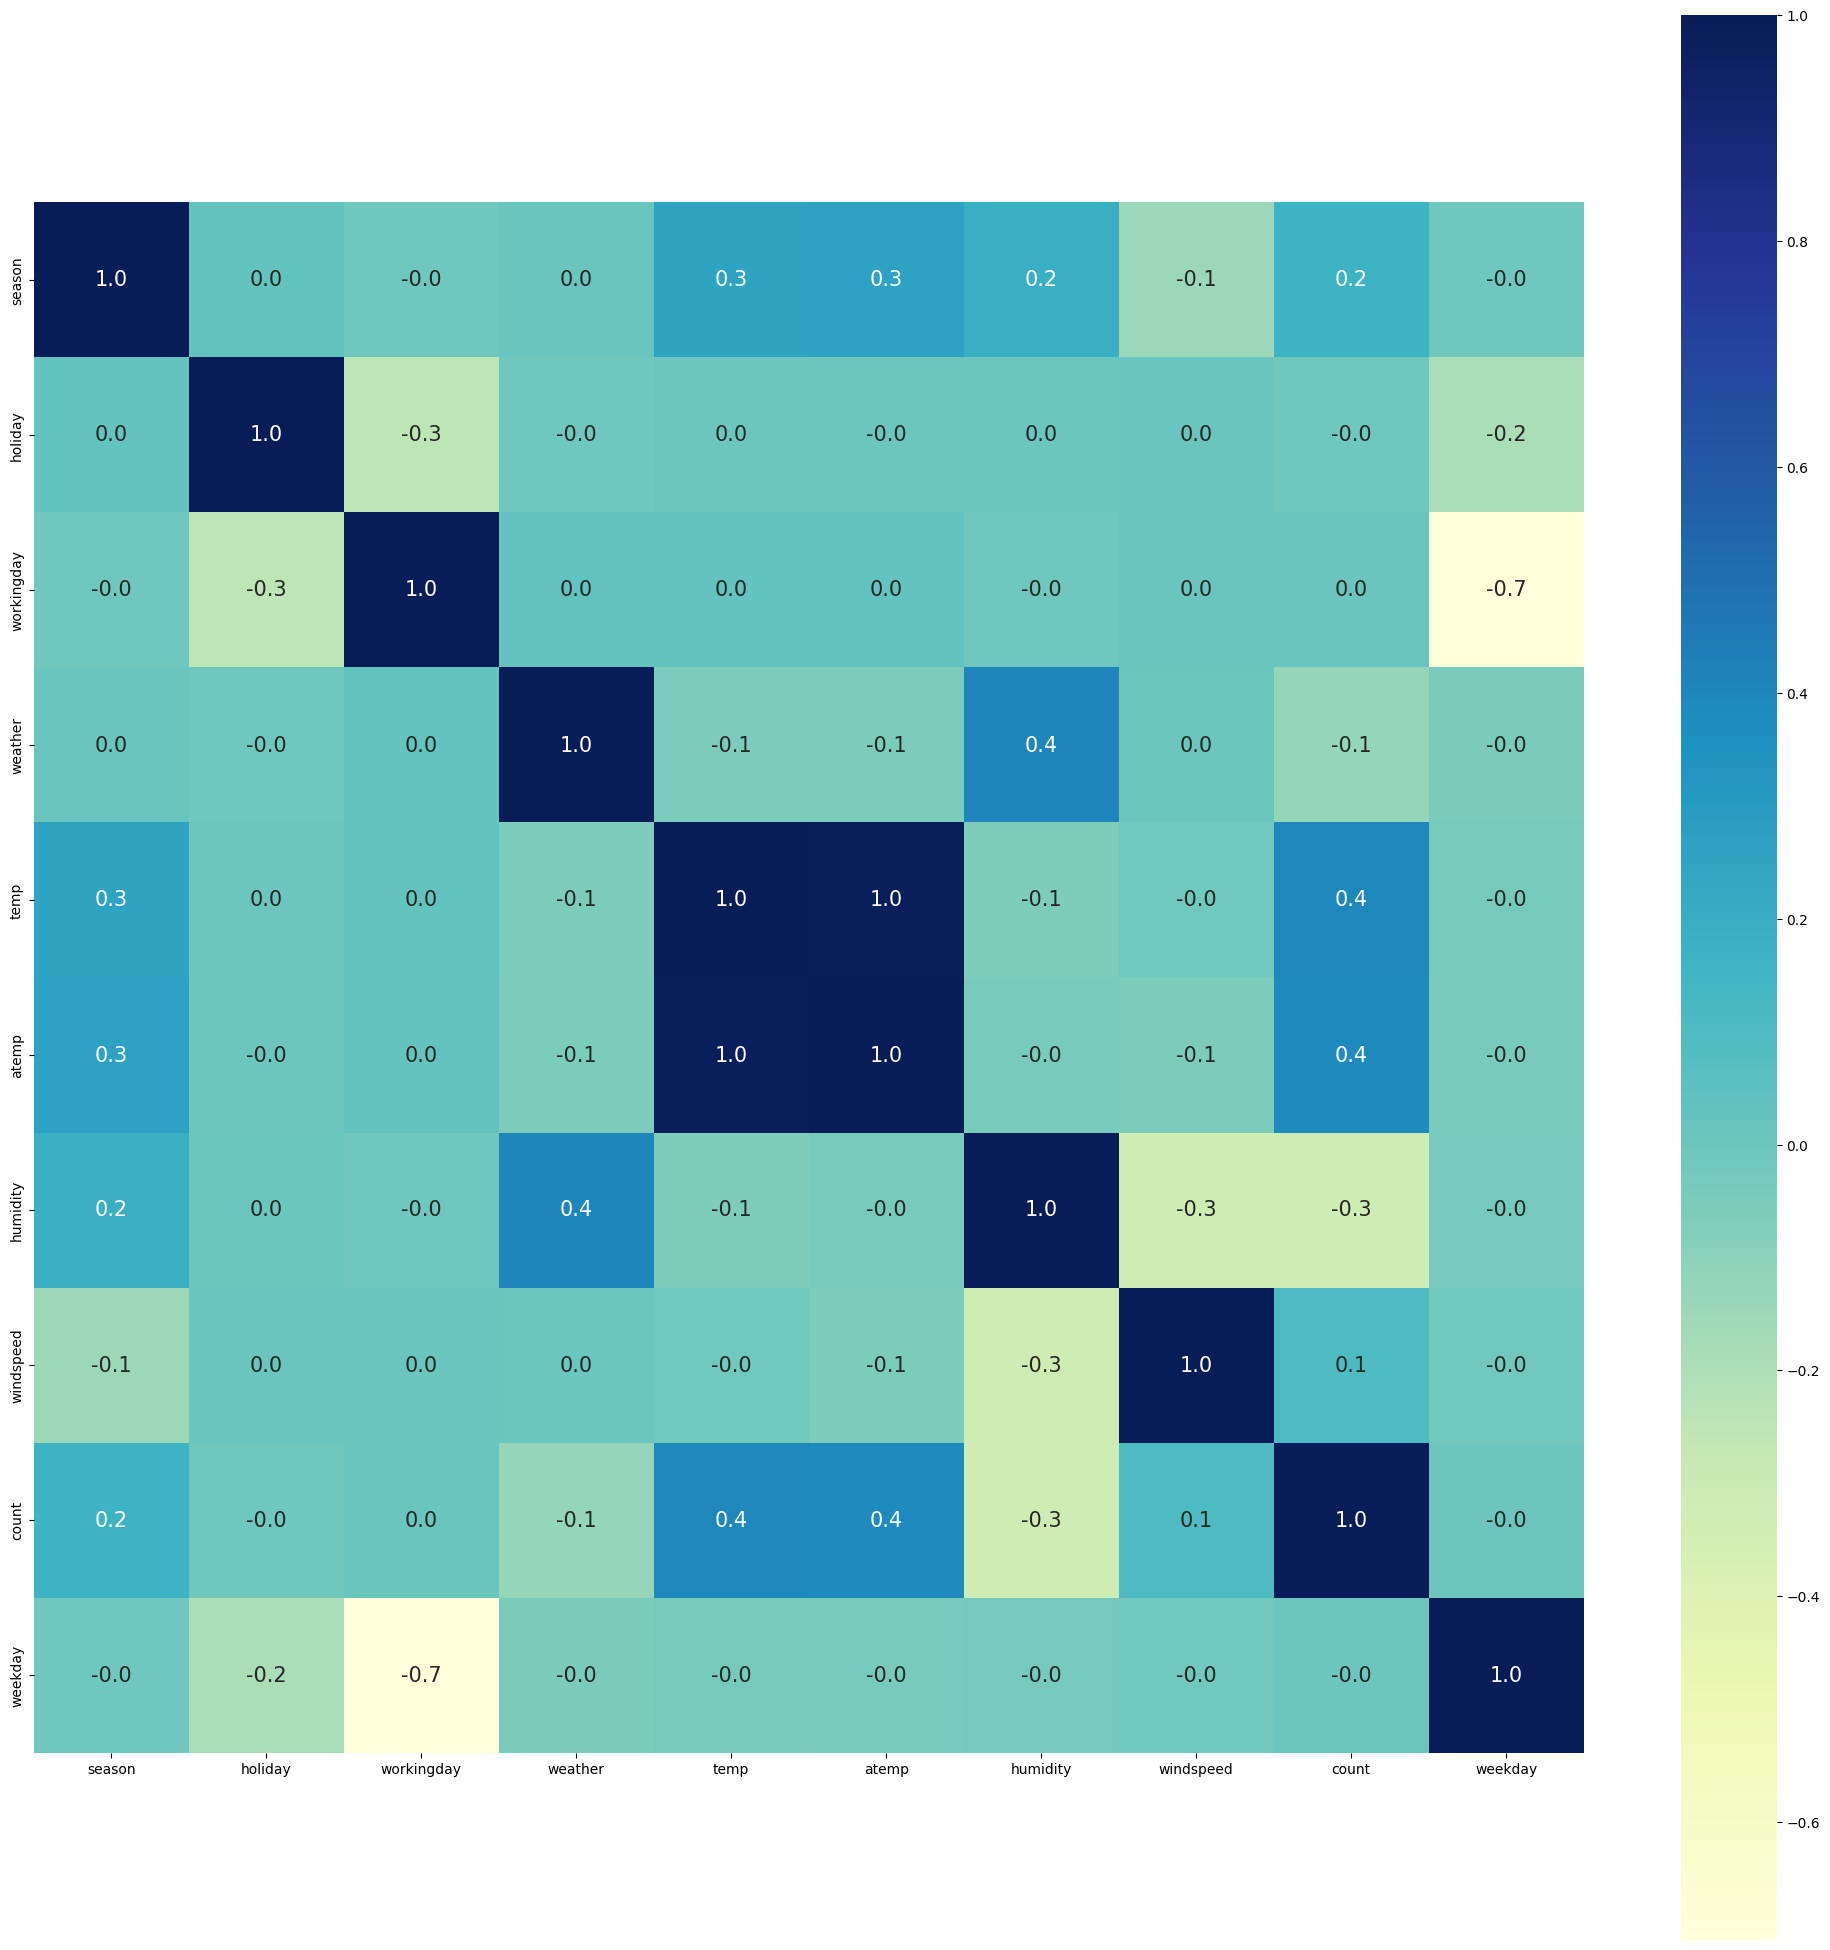

In [15]:
corr = train_data.drop(["datetime"], axis=1).corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')

### 3. Model Building

In [26]:
select_features = ["season", "holiday", "workingday", "weather", "temp", "weekday", "month", "year", "hour"]
X_train = train_data[select_features]
y_train = train_data["count"]

In [27]:
def print_evaluate(true, predicted):
    print("=======Training results=======")
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print("RMSE:", rmse)
    print("R2 Square", r2_square)

#### Linear Regression Model

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_evaluate(y_train, lr.predict(X_train))

=======Training results=======
RMSE: 145.71807717600262
R2 Square 0.352832533178167


#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
print_evaluate(y_train, rfr.predict(X_train))

=======Training results=======
RMSE: 16.6024270210835
R2 Square 0.9915989615350304


#### Gradient Boost

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
gbm.fit(X_train, y_train)
print_evaluate(y_train, gbm.predict(X_train))

=======Training results=======
RMSE: 35.91077772085196
R2 Square 0.9606957571161447


#### Testing 

In [31]:
test_data = pd.read_csv("data/test.csv")
# test_data = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

In [32]:
test_data["date"] = test_data["datetime"].apply(lambda x: x.split()[0])
test_data["hour"] = test_data["datetime"].apply(lambda x: x.split()[1].split(":")[0])
test_data["year"] = test_data["date"].apply(lambda x: x.split("-")[0])
test_data["month"] = test_data["date"].apply(lambda x: x.split("-")[1])
test_data["weekday"] = test_data["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d").weekday())
test_datetime = test_data["datetime"]
test_data.drop(["datetime", "date"], axis=1, inplace=True)
test_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,month,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,00,2011,01,3
1,1,0,1,1,10.66,13.635,56,0.0000,01,2011,01,3
2,1,0,1,1,10.66,13.635,56,0.0000,02,2011,01,3
3,1,0,1,1,10.66,12.880,56,11.0014,03,2011,01,3
4,1,0,1,1,10.66,12.880,56,11.0014,04,2011,01,3


In [33]:
test_predict = rfr.predict(test_data[select_features])

In [36]:
submission = pd.DataFrame({
        "datetime": test_datetime,
        "count": [max(0, x) for x in test_predict]
    })
submission.to_csv("data/sampleSubmission.csv", index=False)